# Customer Booking Analysis

## Introduction

This notebook explores customer booking data to uncover insights and build predictive models. The analysis focuses on understanding booking behavior and identifying factors that influence booking completion. 

### Motive of the Project
The primary objective of this project is to:
1. Analyze customer booking patterns and trends.
2. Identify key factors that influence whether a booking is completed.
3. Build predictive models to classify and forecast booking completion status, enabling better decision-making for customer engagement strategies.

### Target Variable
- **`booking_complete`:**  
  - **Type:** Binary (0 or 1)  
  - **Description:** Indicates whether a booking was completed (`1`) or not (`0`).  
  - This variable serves as the primary outcome to predict.

### Key Areas of Analysis

1. **Exploratory Data Analysis (EDA):**
   - Understanding the data structure and distribution.
   - Visualizing booking completion trends and other key metrics.
   - Identifying patterns and correlations among features.

2. **Data Preprocessing:**
   - Cleaning the raw dataset and handling missing values.
   - Encoding categorical variables and scaling numerical features for model compatibility.
   - Feature engineering to improve model performance.

3. **Predictive Modeling:**
   - Implementing machine learning models to predict booking completion.
   - Evaluating model performance using metrics such as accuracy, precision, and recall.
   - Tuning hyperparameters to optimize model performance.

---

This notebook serves as a comprehensive guide to understanding and predicting customer booking behavior. Let’s dive into the analysis!




In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

**Exploratory Data Analysis (EDA):**

In [3]:
df = pd.read_csv("E:\Forge CSV files for data analytics\Task two\customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [8]:
df.describe(include="all")

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000,50000,50000.000000,50000.00000,50000.00000,50000.000000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,799,104,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,NaN,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,44382,49497,NaN,NaN,NaN,NaN,2680,17872,NaN,NaN,NaN,NaN,NaN
mean,1.591240,NaN,NaN,84.940480,23.04456,9.06634,3.814420,NaN,NaN,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,NaN,NaN,90.451378,33.88767,5.41266,1.992792,NaN,NaN,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,NaN,NaN,0.000000,0.00000,0.00000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,21.000000,5.00000,5.00000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,51.000000,17.00000,9.00000,4.000000,NaN,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,NaN,NaN,115.000000,28.00000,13.00000,5.000000,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


# visualizaztion turing data into insight

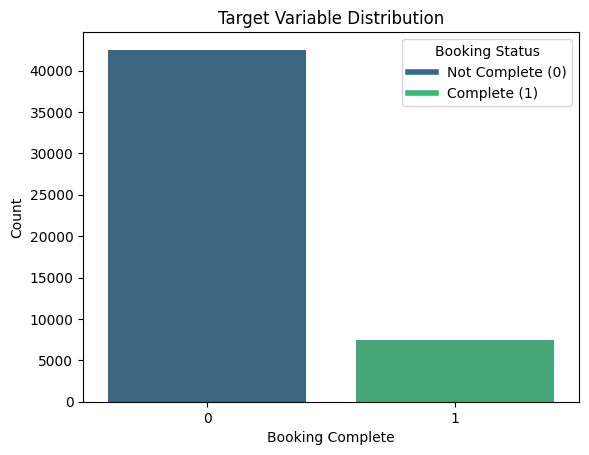

In [9]:
palette = sns.color_palette('viridis', n_colors=2)  
sns.countplot(x='booking_complete', data=df, palette=palette)
handles = [
    plt.Line2D([0], [0], color=palette[0], lw=4, label='Not Complete (0)'),
    plt.Line2D([0], [0], color=palette[1], lw=4, label='Complete (1)')
]
plt.legend(handles=handles, title='Booking Status')
plt.title('Target Variable Distribution')
plt.xlabel('Booking Complete')
plt.ylabel('Count')
plt.show()


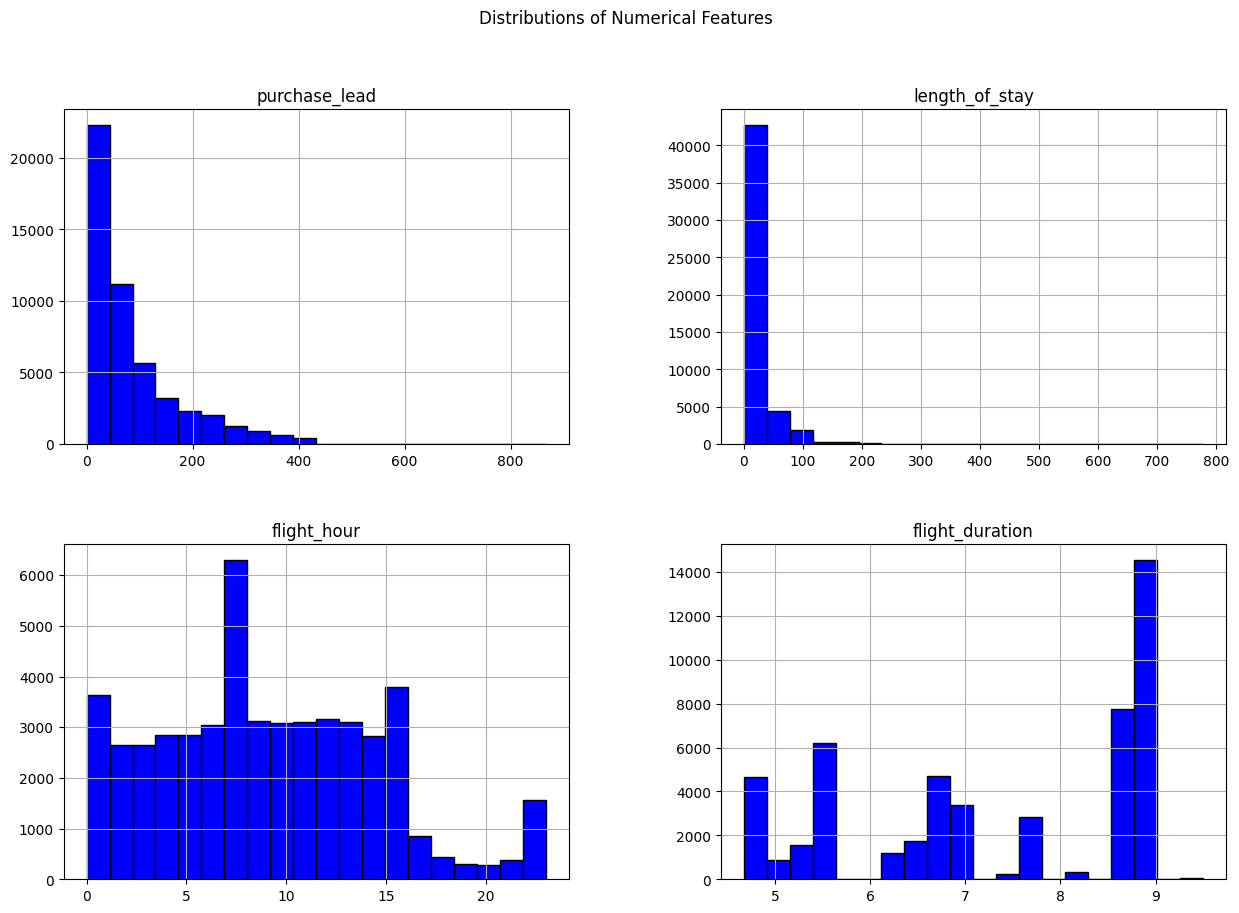

In [10]:
n_cols = ['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
df[n_cols].hist(bins=20, figsize=(15, 10), layout=(2, 2), color='blue', edgecolor='black')
plt.suptitle('Distributions of Numerical Features')
plt.show()

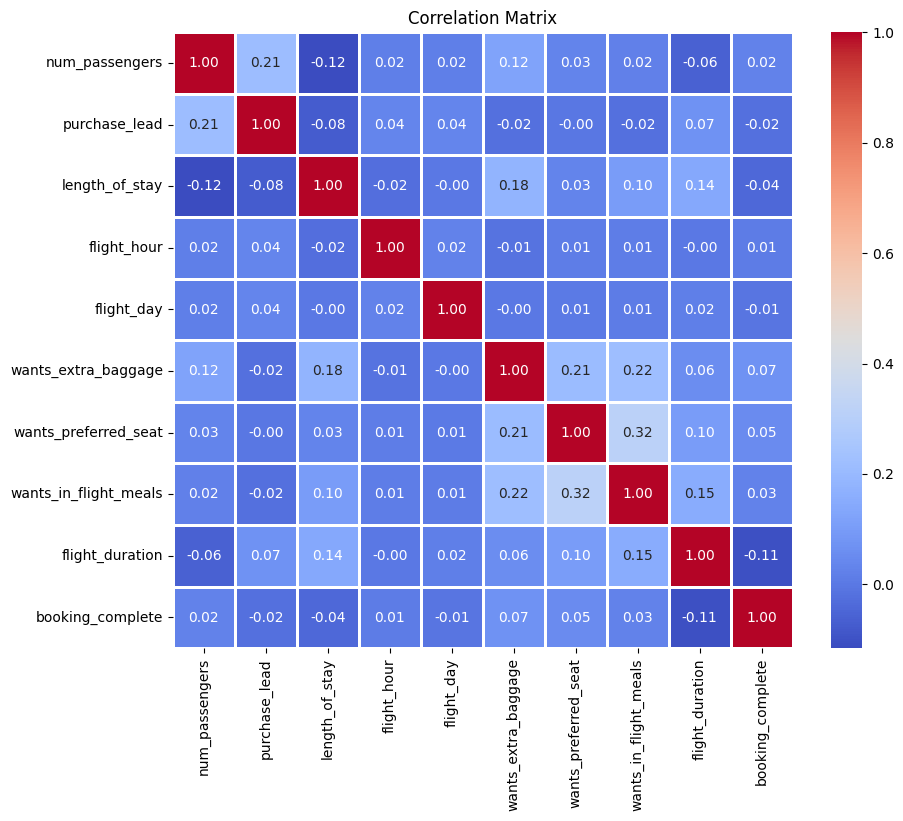

In [11]:
n_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(n_df.corr(),annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation Matrix')
plt.show()

**Data Preprocessing:**

In [12]:
category =['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
label_enconders = {}
for cal in category:
    le = LabelEncoder()
    df[cal] = le.fit_transform(df[cal])
    label_enconders[cal] = le

In [13]:
scaler = StandardScaler()
df[n_cols] = scaler.fit_transform(df[n_cols])
scaler

StandardScaler()

In [14]:
x = df.drop(columns=['booking_complete'])
y= df['booking_complete']
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size=0.2, random_state=42,stratify=y)

In [15]:
print(f"Training set shape: {x_train.shape}")
print(f"Testing set shape: {x_test.shape}")

Training set shape: (40000, 13)
Testing set shape: (10000, 13)


# Predictive Modeling:

# USING radom forest classifer first to see the result 


In [16]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred_rf = rf_model.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8504
           1       0.56      0.10      0.16      1496

    accuracy                           0.85     10000
   macro avg       0.71      0.54      0.54     10000
weighted avg       0.82      0.85      0.81     10000



USING ensemble methods like xgboost to improve recall and f1 score on test set 1


In [18]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'scale_pos_weight': [1, len(y_train[y_train == 0]) / len(y_train[y_train == 1])]  # Handle class imbalance
}

In [19]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')  # Suppress deprecation warning
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='recall', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


c:\Users\yash x\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'scale_pos_weight': [1, 5.686726847208291]},
             scoring='recall', verbose=1)

In [20]:
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': 5.686726847208291}


In [21]:
y_pred_xgb = best_model.predict(x_test)

In [22]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.56      0.70      8504
           1       0.24      0.81      0.37      1496

    accuracy                           0.59     10000
   macro avg       0.59      0.68      0.54     10000
weighted avg       0.84      0.59      0.65     10000



a line plot to compare both of the algorithms perfomance


In [23]:
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

In [24]:
metrics = ['precision', 'recall', 'f1-score']
results_rf = [report_rf['0'][metric] for metric in metrics] + [report_rf['1'][metric] for metric in metrics]
results_xgb = [report_xgb['0'][metric] for metric in metrics] + [report_xgb['1'][metric] for metric in metrics]

In [25]:
labels = ['Precision (Class 0)', 'Recall (Class 0)', 'F1 (Class 0)', 
          'Precision (Class 1)', 'Recall (Class 1)', 'F1 (Class 1)']

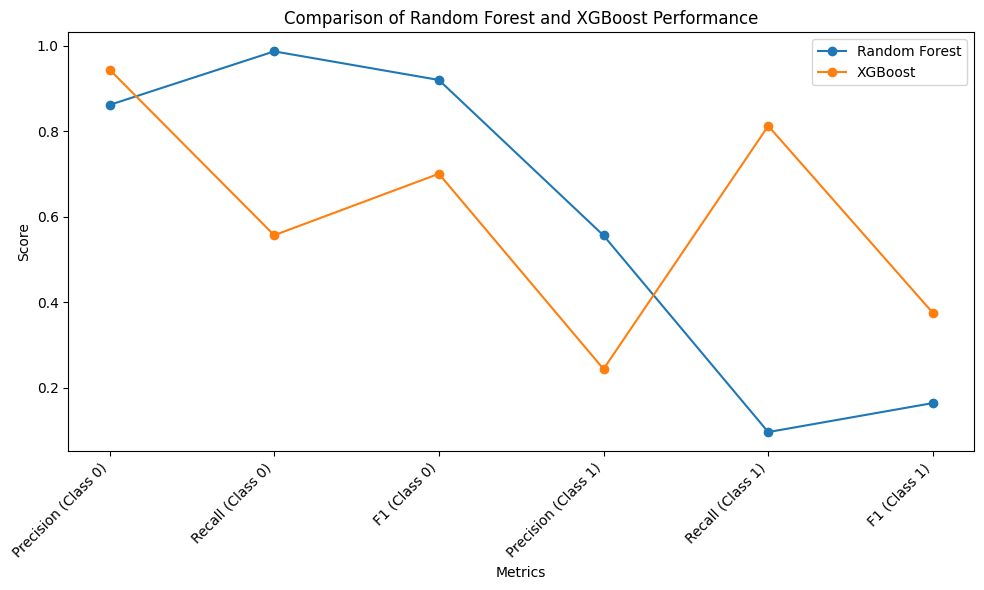

In [26]:
plt.figure(figsize=(10, 6))
x = range(len(labels))
plt.plot(x, results_rf, label='Random Forest', marker='o')
plt.plot(x, results_xgb, label='XGBoost', marker='o')
plt.xticks(x, labels, rotation=45, ha='right')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Random Forest and XGBoost Performance')
plt.legend()
plt.tight_layout()
plt.show()